## Machine Learning Model Building Pipeline: Machine Learning Model Build

In the following videos, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline, which we described in the previous lectures. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 4: Building the Final Machine Learning Model**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or under-estimated.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Model building

In the following cells, we will finally build our machine learning model, utilising the engineered data and the pre-selected features. 


### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [17]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [36]:
# load the train and test set with the engineered variables

# we built and saved these datasets in a previous notebook.
# If you haven't done so, go ahead and check the previous notebooks (step 2)
# to find out how to create these datasets

X_train = pd.read_csv('../data/processed/xtrain.csv')
X_test = pd.read_csv('../data/processed/xtest.csv')

X_train.head()

,id,postcode,primary_address,secondary_address,street,latitude,longitude,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,london_zone,middle_layer_super_output_area,postcode_area,postcode_district,quality,user_type,last_updated,nearest_station,distance_to_station,postcode_area.1,postcode_district.1,police_force,water_company,plus_code,average_income,sewage_company,travel_to_work_area,rural_urban,altitude,region_name,area_code,adjusted_price,type_D,type_F,type_O,type_S,type_T,land_F,new_build_Y
0,0,0.0,0.384615,0.0,0.0,0.297610,0.708851,0.0,0.951220,0.666667,0.0,0.666667,0.0,0.951220,0.0,0.777778,1.000000,0.0,0.522727,0.0,0.0,0.0,0.0,0.0,0.689014,0.522727,0.0,0.947368,0.888889,0.0,0.626321,1.0,0.708333,0.666667,0.269953,0.666667,0.666667,12.926339,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0.846154,1.0,0.0,0.240519,0.738338,0.0,1.000000,0.666667,0.0,0.666667,0.0,1.000000,0.0,1.000000,0.666667,0.0,0.522727,0.0,0.0,0.0,0.0,0.0,-0.375478,0.522727,0.0,1.000000,0.944444,0.0,0.582384,1.0,1.000000,0.666667,0.110329,0.666667,0.666667,12.416423,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.461538,0.0,0.0,0.420328,0.552343,0.0,0.292683,0.666667,0.0,0.666667,0.0,0.292683,0.0,0.555556,1.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.025923,0.500000,0.0,0.368421,0.277778,0.0,0.591111,0.4,0.333333,0.333333,0.298122,0.666667,0.666667,12.862997,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,0.923077,0.0,0.0,0.470684,0.716527,0.0,0.146341,0.666667,0.0,0.666667,0.0,0.146341,0.0,0.444444,1.000000,0.0,0.340909,0.0,0.0,0.0,0.0,0.0,2.408421,0.340909,0.0,0.263158,0.333333,0.0,0.680413,0.4,0.375000,1.000000,0.028169,0.666667,0.666667,13.213782,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.153846,0.0,0.0,0.443657,0.597107,0.0,0.414634,0.666667,0.0,0.666667,0.0,0.414634,0.0,0.444444,1.000000,0.0,0.477273,0.0,0.0,0.0,0.0,0.0,1.169875,0.477273,0.0,0.500000,0.277778,0.0,0.541677,0.4,0.458333,0.500000,0.178404,0.666667,0.666667,12.209063,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
X_train.isnull().sum()

primary_address        0
secondary_address      0
street                 0
latitude               0
longitude              0
county                 0
district               0
county_code            0
region                 0
london_zone            0
postcode_area          0
quality                0
user_type              0
distance_to_station    0
postcode_area.1        0
police_force           0
water_company          0
average_income         0
sewage_company         0
travel_to_work_area    0
rural_urban            0
altitude               0
region_name            0
type_D                 0
type_F                 0
type_O                 0
type_S                 0
type_T                 0
land_F                 0
land_L                 0
land_U                 0
new_build_N            0
dtype: int64

In [37]:
# capture the target (remember that is log transformed)

y_train = X_train['adjusted_price']
y_test = X_test['adjusted_price']

In [5]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

# if you haven't done so, go ahead and visit the previous notebook
# to find out how to select the features

features = pd.read_csv('../data/processed/selected_features.csv')
features = features['0'].to_list() 

# We will add one additional feature to the ones we selected in the
# previous notebook: LotFrontage

# why?
#=====

# because it needs key feature engineering steps that we want to
# discuss further during the deployment part of the course. 

features = features

# display final feature set
features

['primary_address',
 'secondary_address',
 'street',
 'latitude',
 'longitude',
 'county',
 'district',
 'county_code',
 'region',
 'london_zone',
 'postcode_area',
 'quality',
 'user_type',
 'distance_to_station',
 'postcode_area.1',
 'police_force',
 'water_company',
 'average_income',
 'sewage_company',
 'travel_to_work_area',
 'rural_urban',
 'altitude',
 'region_name',
 'type_D',
 'type_F',
 'type_O',
 'type_S',
 'type_T',
 'land_F',
 'land_L',
 'land_U',
 'new_build_N']

In [38]:
# reduce the train and test set to the selected features
features = list(X_train)
features.remove('distance_to_station')
features.remove('adjusted_price')
X_train = X_train[features]
X_test = X_test[features]

In [39]:
list(X_train)

['id',
 'postcode',
 'primary_address',
 'secondary_address',
 'street',
 'latitude',
 'longitude',
 'grid_ref',
 'county',
 'district',
 'ward',
 'district_code',
 'ward_code',
 'county_code',
 'constituency',
 'region',
 'london_zone',
 'middle_layer_super_output_area',
 'postcode_area',
 'postcode_district',
 'quality',
 'user_type',
 'last_updated',
 'nearest_station',
 'postcode_area.1',
 'postcode_district.1',
 'police_force',
 'water_company',
 'plus_code',
 'average_income',
 'sewage_company',
 'travel_to_work_area',
 'rural_urban',
 'altitude',
 'region_name',
 'area_code',
 'type_D',
 'type_F',
 'type_O',
 'type_S',
 'type_T',
 'land_F',
 'new_build_Y']

### Regularised linear regression: Lasso

Remember to set the seed.

In [16]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.005, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [40]:
X_train.head()

,id,postcode,primary_address,secondary_address,street,latitude,longitude,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,london_zone,middle_layer_super_output_area,postcode_area,postcode_district,quality,user_type,last_updated,nearest_station,postcode_area.1,postcode_district.1,police_force,water_company,plus_code,average_income,sewage_company,travel_to_work_area,rural_urban,altitude,region_name,area_code,type_D,type_F,type_O,type_S,type_T,land_F,new_build_Y
0,0,0.0,0.384615,0.0,0.0,0.297610,0.708851,0.0,0.951220,0.666667,0.0,0.666667,0.0,0.951220,0.0,0.777778,1.000000,0.0,0.522727,0.0,0.0,0.0,0.0,0.0,0.522727,0.0,0.947368,0.888889,0.0,0.626321,1.0,0.708333,0.666667,0.269953,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0.846154,1.0,0.0,0.240519,0.738338,0.0,1.000000,0.666667,0.0,0.666667,0.0,1.000000,0.0,1.000000,0.666667,0.0,0.522727,0.0,0.0,0.0,0.0,0.0,0.522727,0.0,1.000000,0.944444,0.0,0.582384,1.0,1.000000,0.666667,0.110329,0.666667,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.461538,0.0,0.0,0.420328,0.552343,0.0,0.292683,0.666667,0.0,0.666667,0.0,0.292683,0.0,0.555556,1.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.368421,0.277778,0.0,0.591111,0.4,0.333333,0.333333,0.298122,0.666667,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,0.923077,0.0,0.0,0.470684,0.716527,0.0,0.146341,0.666667,0.0,0.666667,0.0,0.146341,0.0,0.444444,1.000000,0.0,0.340909,0.0,0.0,0.0,0.0,0.0,0.340909,0.0,0.263158,0.333333,0.0,0.680413,0.4,0.375000,1.000000,0.028169,0.666667,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.153846,0.0,0.0,0.443657,0.597107,0.0,0.414634,0.666667,0.0,0.666667,0.0,0.414634,0.0,0.444444,1.000000,0.0,0.477273,0.0,0.0,0.0,0.0,0.0,0.477273,0.0,0.500000,0.277778,0.0,0.541677,0.4,0.458333,0.500000,0.178404,0.666667,0.666667,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 20220539478
train rmse: 142198
train r2: 0.55853599698088

test mse: 20410289589
test rmse: 142864
test r2: 0.5492948345761586

Average house price:  255443


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

lin_model = RandomForestRegressor(n_estimators = 200)
# lin_model = MLPRegressor()
lin_model.fit(X_train, y_train)

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 2965056781
train rmse: 54452
train r2: 0.935265533467931

test mse: 16208066977
test rmse: 127310
test r2: 0.6420893747705125

Average house price:  255443


In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred))))
print('Root Mean Log Squared Error:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))
print('Mean Absolute Error/Mean :', (metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)) / np.exp(y_train).mean() * 100),'%')

Mean Absolute Error: 78009.55578684044
Root Mean Squared Error: 127310.90674856113
Root Mean Log Squared Error: 0.35758183043497765
Mean Absolute Error/Mean : 24.966748781395214 %


In [32]:
y_train

0        12.073135
1        11.792011
2        12.368234
3        12.330531
4        11.752446
           ...    
89995    12.360295
89996    12.281148
89997    11.810122
89998    12.412217
89999    11.547617
Name: adjusted_price, Length: 90000, dtype: float64

In [13]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 92323946800
train rmse: 303848
train r2: 0.22581826297957752

test mse: 89942207406
test rmse: 299903
test r2: 0.23416380853660312

Average house price:  253998


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

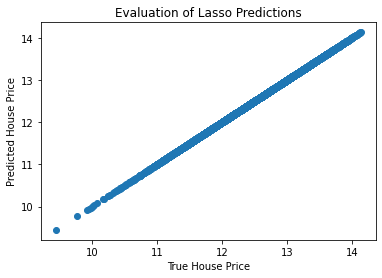

In [34]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

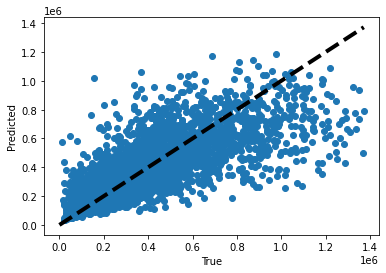

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, lin_model.predict(X_test))
ax.plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

We can see that our model is doing a pretty good job at estimating house prices.

<AxesSubplot:>

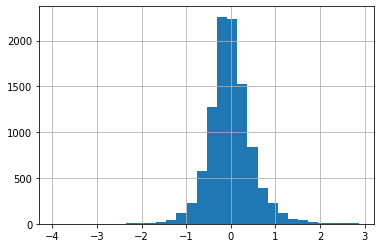

In [15]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=30)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

In [37]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

And that is all! Now we have our entire pipeline ready for deployment. 

In the next video, we will summarise which steps from the pipeline we will deploy to production.